In [32]:
import numpy as np
import matplotlib.pyplot as plt
class MLP221:
    def __init__(self, act='sigmoid', seed=0):
        np.random.seed(seed)
        self.act = act
        self.W1 = np.random.randn(2,2)*0.5; self.b1 = np.zeros((1,2))
        self.W2 = np.random.randn(2,1)*0.5; self.b2 = np.zeros((1,1))
    def forward(self,X):
        self.Z1 = X@self.W1+self.b1
        self.A1 = sigmoid(self.Z1) if self.act=='sigmoid' else relu(self.Z1)
        self.Z2 = self.A1@self.W2+self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    def fit(self,X,y,lr,epochs):
        y = y.reshape(-1,1)
        for _ in range(epochs):
            A2 = self.forward(X)
            dA2 = (A2-y)*dsigmoid(A2)
            dW2 = self.A1.T@dA2; db2 = dA2.sum(0,keepdims=True)
            dA1 = dA2@self.W2.T * (dsigmoid(self.A1) if self.act=='sigmoid' else drelu(self.Z1))
            dW1 = X.T@dA1; db1 = dA1.sum(0,keepdims=True)
            self.W1 -= lr*dW1; self.b1 -= lr*db1
            self.W2 -= lr*dW2; self.b2 -= lr*db2
    def predict(self,X): return (self.forward(X)>=0.5).astype(int)
    def accuracy(self,X,y): return np.mean(self.predict(X).ravel()==y)

X = np.array([[0,0],[0,1],[1,0],[1,1]],float)
y = np.array([0,1,1,0],int)

for act in ["sigmoid","relu"]:
    for lr in [0.01,0.1,0.5]:
        for ep in [500,1000,5000]:
            mlp = MLP221(act=act)
            mlp.fit(X,y,lr,ep)
            acc = mlp.accuracy(X,y)
            print(f"act={act}, lr={lr}, epochs={ep} -> acc={acc:.2f}")

print("Predictions:", mlp.predict(X).ravel())

act=sigmoid, lr=0.01, epochs=500 -> acc=0.50
act=sigmoid, lr=0.01, epochs=1000 -> acc=0.50
act=sigmoid, lr=0.01, epochs=5000 -> acc=0.50
act=sigmoid, lr=0.1, epochs=500 -> acc=0.50
act=sigmoid, lr=0.1, epochs=1000 -> acc=0.50
act=sigmoid, lr=0.1, epochs=5000 -> acc=1.00
act=sigmoid, lr=0.5, epochs=500 -> acc=0.75
act=sigmoid, lr=0.5, epochs=1000 -> acc=1.00
act=sigmoid, lr=0.5, epochs=5000 -> acc=1.00
act=relu, lr=0.01, epochs=500 -> acc=0.50
act=relu, lr=0.01, epochs=1000 -> acc=0.75
act=relu, lr=0.01, epochs=5000 -> acc=1.00
act=relu, lr=0.1, epochs=500 -> acc=1.00
act=relu, lr=0.1, epochs=1000 -> acc=1.00
act=relu, lr=0.1, epochs=5000 -> acc=1.00
act=relu, lr=0.5, epochs=500 -> acc=1.00
act=relu, lr=0.5, epochs=1000 -> acc=1.00
act=relu, lr=0.5, epochs=5000 -> acc=1.00
Predictions: [0 1 1 0]


In [31]:
def accuracy(y_true, y_pred):
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    tp = np.sum((y_true==1) & (y_pred==1))
    fp = np.sum((y_true==0) & (y_pred==1))
    return tp / (tp + fp + 1e-10)

def recall(y_true, y_pred):
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    tp = np.sum((y_true==1) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))
    return tp / (tp + fn + 1e-10)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-10)

def roc_curve(y_true, y_scores, num_thresholds=100):
    thresholds = np.linspace(0,1,num_thresholds)
    tpr_list = []
    fpr_list = []
    y_true = y_true.ravel()
    for t in thresholds:
        y_pred = (y_scores >= t).astype(int)
        tp = np.sum((y_true==1) & (y_pred==1))
        fp = np.sum((y_true==0) & (y_pred==1))
        fn = np.sum((y_true==1) & (y_pred==0))
        tn = np.sum((y_true==0) & (y_pred==0))
        tpr = tp / (tp + fn + 1e-10)
        fpr = fp / (fp + tn + 1e-10)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return np.array(fpr_list), np.array(tpr_list), thresholds


In [30]:
y_prob = mlp.forward(X)
y_pred = mlp.predict(X)

print("Accuracy:", accuracy(y, y_pred))
print("Precision:", precision(y, y_pred))
print("Recall:", recall(y, y_pred))
print("F1-Score:", f1_score(y, y_pred))

fpr, tpr, thresholds = roc_curve(y, y_prob)
print("FPR:", fpr)
print("TPR:", tpr)

Accuracy: 1.0
Precision: 0.99999999995
Recall: 0.99999999995
F1-Score: 0.9999999999
FPR: [1.   0.75 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.  ]
TPR: [1.   0.75 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5

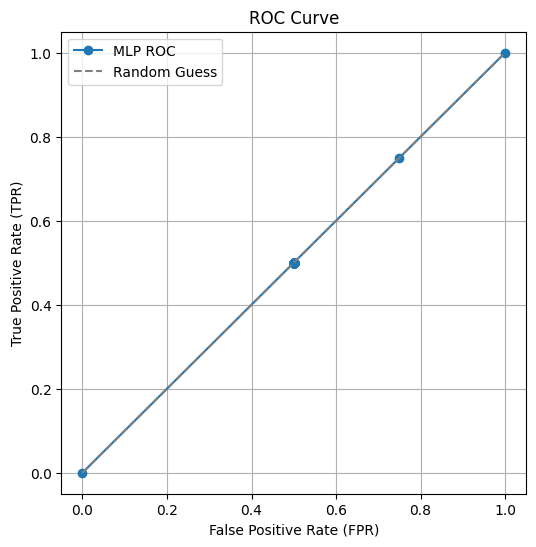

In [29]:
y_prob = mlp.forward(X)
y_pred = mlp.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, marker='o', label='MLP ROC')
plt.plot([0,1],[0,1],'--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()